# Deskripsi 

Data ini merupakan data tentang laporan kekerasan dan kejahatan terhadap perempuan, dibeberapa wilayah, Negara India yang diambil pada tahun 2001 - 2021. Data tersebut telah direkap dari situs data.govin, yakni portal resmi yang disediakan pemerintahan Negara India. Data ini diperlukan untuk menganalisis dan memantau perkembangan (bertambah atau berkurang) tingkat kasus kekerasan dan kejahatan terhadap perempuan, berdasarkan variabel - variabel yang diamati, yakni sebagai berikut.

1. No : Nomer urut
2. State : Wilayah di Negara India
3. Year : Tahun kejadian kekerasan dan kejahatan terhadap perempuan dalam rentang tahun 2001 - 2021.
4. Rape : Kasus pemerkosaan tehadap perempuan.
5. K&A (Kidnapping & Abduction) : Kasus penculikan terhadap perempuan yang melibatkan unsur ancaman atau non ancaman (tipu daya).
6. DD (Dowry Deaths) : Kasus kematian dikarenakan kekerasan atau pelecahan didalam rumah tangga.
7. AoW (Assault Against Women) : Kasus kekerasan atau serangan secara fisik, seksual, dan psikologis terhadap perempuan.
8. AoM (Assault Against Women Modesty Of Women) : Kasus yang mengacu pada tindakan merusak, melanggar, dan menyerang kehormatan serta martabat perempuan.
9. DV (Domestic Violence) : Kasus Kekerasan Dalam Rumah Tangga (KDRT) terhadap pihak perempuan.
10. WT (Women Trafficking) : Kasus penjualan dan perdagangan perempuan secara ilegal dengan tujuan eksploitasi

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import skew
import matplotlib.pyplot as plt

In [91]:
data = pd.read_csv (r'D:\KULIAH\CrimesOnWomenData.csv', sep= ",")
data.head()

,No,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No      736 non-null    int64 
 1   State   736 non-null    object
 2   Year    736 non-null    int64 
 3   Rape    736 non-null    int64 
 4   K&A     736 non-null    int64 
 5   DD      736 non-null    int64 
 6   AoW     736 non-null    int64 
 7   AoM     736 non-null    int64 
 8   DV      736 non-null    int64 
 9   WT      736 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 57.6+ KB


# Visualisasi Data 

<Figure size 1000x600 with 0 Axes>

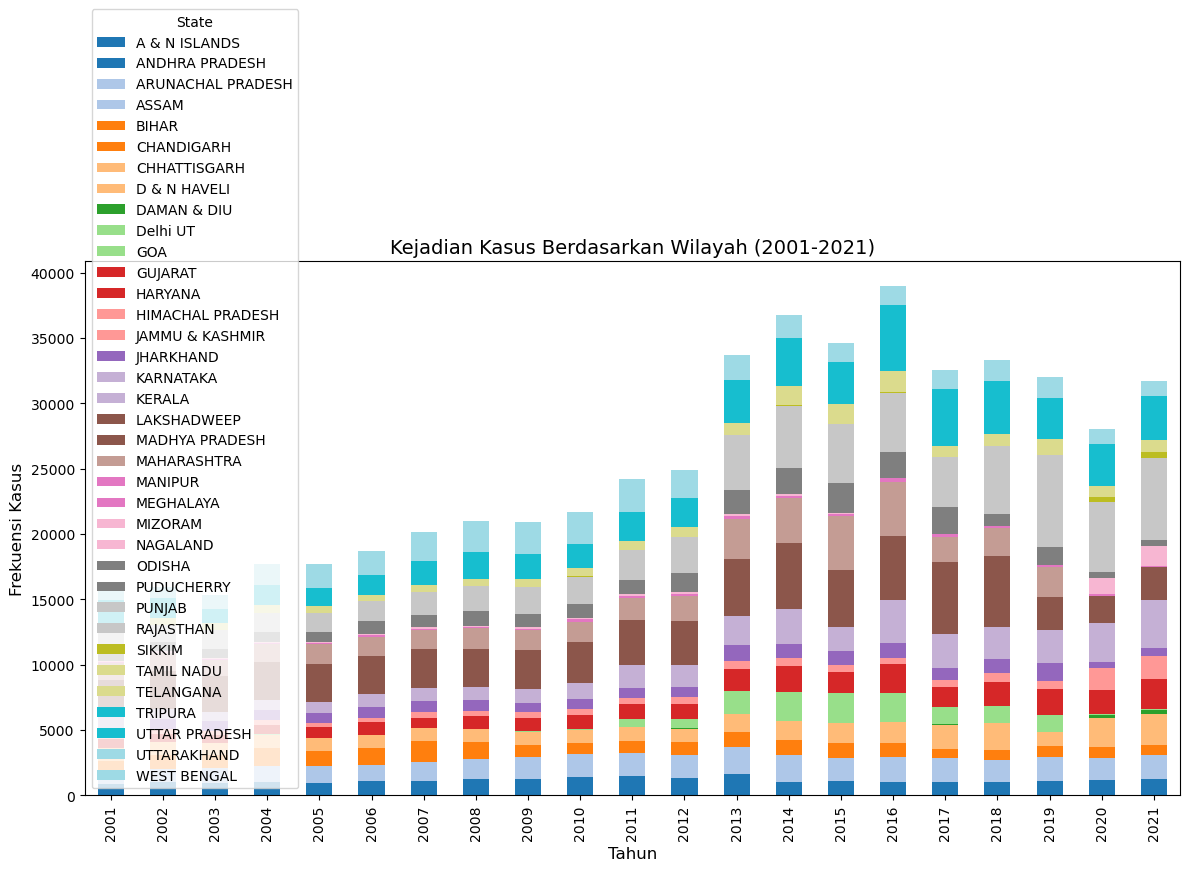

In [93]:
pivot_data = data.pivot_table(values='Rape', index='Year', columns='State', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10,6))
pivot_data.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12,8))
plt.title('Kejadian Kasus Berdasarkan Wilayah (2001-2021)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Frekuensi Kasus', fontsize=12)
plt.tight_layout()
plt.show()

Pada grafik diatas, terlihat terdapat bagan kejadian seluruh kasus berdasarkan wilayah dari tahun 2001 hingga 2021. Dan bentuk dari bagan sendiri merujuk pada distribusi waktu (Time Series Distribution) dan Distribusi Kategorikal, yang dimana mengutamakan kategorial dan hanya jumlah kejadian pertahunnya (untuk perbandingan kejadian kasus dari tahun ke tahun).

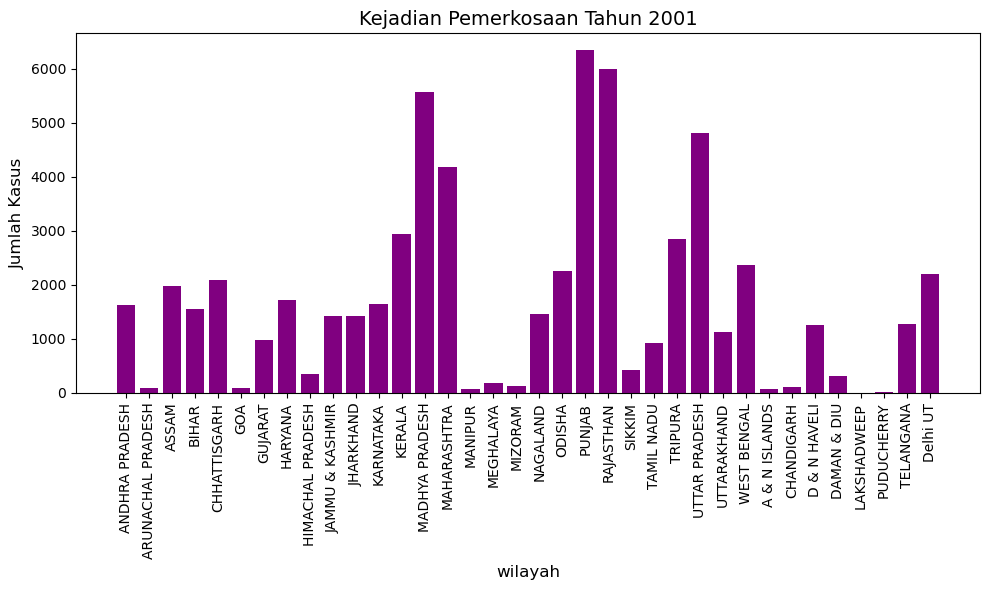

In [94]:
plt.figure(figsize=(10,6))
plt.bar(data['State'], data['Rape'], color='purple')
plt.title('Kejadian Pemerkosaan Tahun 2001', fontsize=14)
plt.xlabel('wilayah', fontsize=12)
plt.ylabel('Jumlah Kasus', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

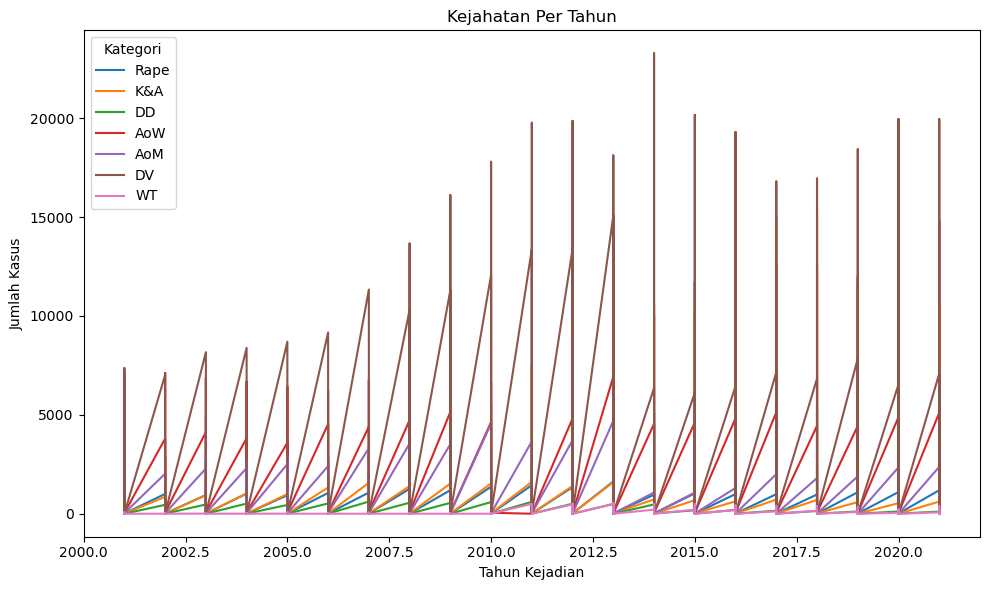

In [95]:
plt.figure(figsize=(10,6))
plt.plot(data['Year'], data['Rape'], label='Rape')
plt.plot(data['Year'], data['K&A'], label='K&A')
plt.plot(data['Year'], data['DD'], label='DD')
plt.plot(data['Year'], data['AoW'], label='AoW')
plt.plot(data['Year'], data['AoM'], label='AoM')
plt.plot(data['Year'], data['DV'], label='DV')
plt.plot(data['Year'], data['WT'], label='WT')
plt.title('Kejahatan Per Tahun')
plt.xlabel('Tahun Kejadian')
plt.ylabel('Jumlah Kasus')
plt.legend(title='Kategori')
plt.tight_layout()
plt.show()

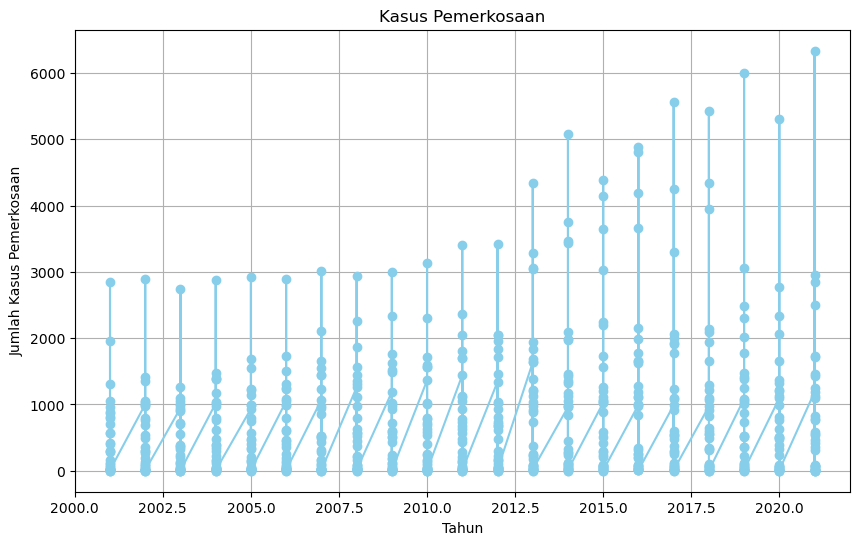

In [96]:
plt.figure(figsize=(10, 6))  
plt.plot(data['Year'], data['Rape'], marker='o', linestyle='-', color='skyblue')  
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus Pemerkosaan')
plt.title('Kasus Pemerkosaan')
plt.grid(True)
plt.show()

# Pemusatan Data

In [97]:
kolom = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
hasil = []
for perhitungan in kolom:
    mean = data[perhitungan].mean()
    median = data[perhitungan].median()
    modus = data[perhitungan].mode()[0]
    
    hasil.append({
        'Kasus': perhitungan,
        'Mean': mean,
        'Median': median,
        'Modus': modus
    })
    
hasil_df = pd.DataFrame(hasil)
print(hasil_df)

  Kasus         Mean  Median  Modus
0  Rape   727.855978   348.5      0
1   K&A  1134.542120   290.0      0
2    DD   215.692935    29.0      0
3   AoW  1579.115489   387.5      0
4   AoM   332.722826    31.0      0
5    DV  2595.078804   678.5      3
6    WT    28.744565     0.0      0


In [98]:
Filter_data = data[(data['Rape'] == 730)]
Pencarian = Filter_data[['Year', 'State']]
print(Pencarian)

     Year  State
631  2019  BIHAR


Misal pemusatan data diambil dari rata - rata kasus kejahatan rape (pemerkosaan) antara tahun 2001 - 2021, dan didapat dalam hal ini menemukan jika kasus rata - rata terdapat pada wilayah Bihar pada tahun 2019 dengan pembulatan 730 kasus. Dapat disimpulkan bahwa tahun 2019 kasus rape (pemerkosaan) sebagai batas rata - rata antisipasi kejadian pemerkosaan sebelum memuncak.

# Penyebaran Data

In [99]:
hasil_penyebaran = []
for perhitungan in kolom:
    varians = data[perhitungan].var()
    standart_deviasi = data[perhitungan].std()
    kuartil = data[perhitungan].quantile([0.25, 0.5, 0.75])
    range = data[perhitungan].max() - data[perhitungan].min() 
    
    hasil_penyebaran.append({
        'Kasus': perhitungan,
        'Varians': varians,
        'Standar Deviasi': standart_deviasi,
        'Kuartil 1': kuartil[0.25],
        'Kuartil 2 (Median)': kuartil[0.5],
        'Kuartil 3': kuartil[0.75],
        'Range': range
    })

hasil_penyebaran_df = pd.DataFrame(hasil_penyebaran)
print(hasil_penyebaran_df)

  Kasus       Varians  Standar Deviasi  Kuartil 1  Kuartil 2 (Median)  \
0  Rape  9.545777e+05       977.024945      35.00               348.5   
1   K&A  3.974189e+06      1993.536828      24.75               290.0   
2    DD  1.805632e+05       424.927334       1.00                29.0   
3   AoW  6.071111e+06      2463.962518      34.00               387.5   
4   AoM  6.496756e+05       806.024551       3.00                31.0   
5    DV  1.633780e+07      4042.004953      13.00               678.5   
6    WT  6.399946e+03        79.999660       0.00                 0.0   

   Kuartil 3  Range  
0    1069.00   6337  
1    1216.00  15381  
2     259.00   2524  
3    2122.25  14853  
4     277.50   9422  
5    3545.00  23278  
6      15.00    549  


Arti dari penyebaran data diatas, misalkan pada variabel Rape (kasus pemerkosaan) pada perhitungan varians dengan 9.545 bahwa nilai pemerkosaan memiliki penyebaran cukup tinggi dibandingkan kasus lainnya, standar deviasi memberitahukan seberapa jauh kasus itu tersebar sekitar pada rentang 977 kasus dari rata - rata. dan pada kuartil 1 dan 3 menunjukan nilai ekstrem dikedua batas/ujung. dan range memberitahu penyebaran yang cukup luas dan signifikan. dan jika dilihat dari penyebaran data kasus WT dan DD menunjukan penyebaran yang lebih kecil.

# Analisis Skewness

In [100]:
hasil_skewness = {}
for perhitungan in kolom:
    hasil_skewness[perhitungan] = data[perhitungan].skew()

skewness_df = pd.DataFrame(list(hasil_skewness.items()), columns=['Kasus', 'Skewness'])
skewness_df

,Kasus,Skewness
0,Rape,2.283916
1,K&A,3.127420
2,DD,3.373033
3,AoW,2.259985
4,AoM,4.878237
5,DV,2.238271
6,WT,4.049240


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

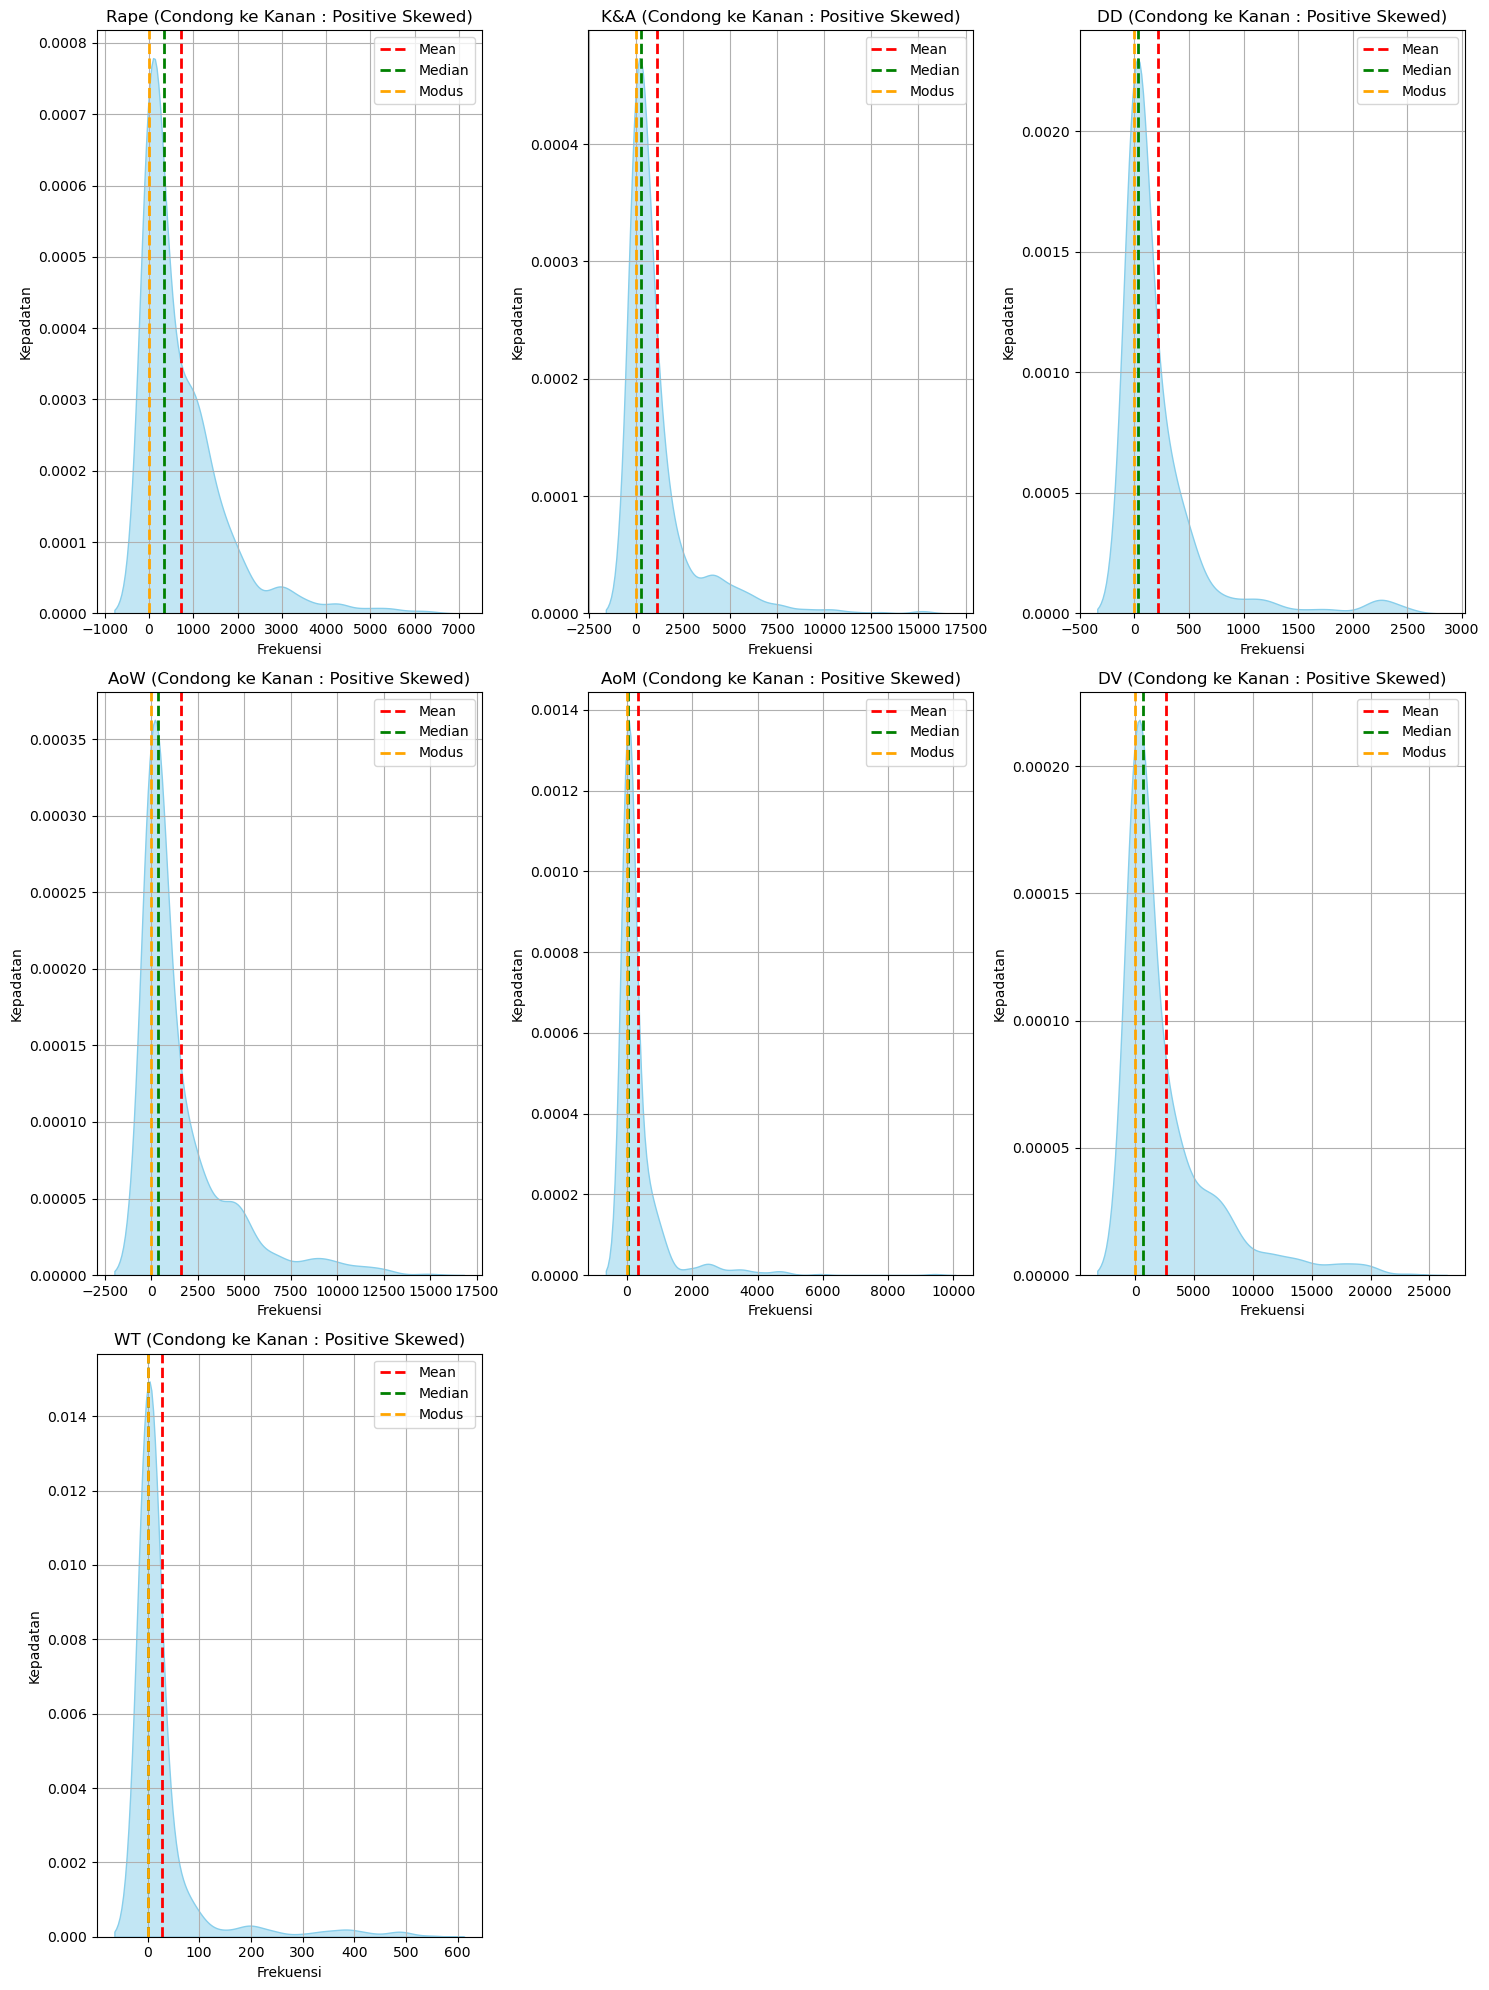

In [101]:
plt.figure(figsize=(15, 20))
for i, perhitungan in enumerate(kolom):  
    plt.subplot(3, 3, i + 1)  
    kolom_data = data[perhitungan]  

    sns.kdeplot(kolom_data, fill=True, color='skyblue', alpha=0.5)

    mean = kolom_data.mean()
    median = kolom_data.median()
    modus = kolom_data.mode()[0]
    skewness = skew(kolom_data)  # Calculate skewness

    # Menandai mean, median, modus
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(modus, color='orange', linestyle='dashed', linewidth=2, label='Modus')

    # Add skewness to the plot title
    if skewness > 0:
        plt.title(f"{perhitungan} (Condong ke Kanan : Positive Skewed)")
    elif skewness < 0:
        plt.title(f"{perhitungan} (Condong ke Kiri : Negative Skewed)")
    else:
        plt.title(f"{perhitungan} (Distribusi Simetris)")

    plt.xlabel('Frekuensi')
    plt.ylabel('Kepadatan')
    plt.legend()
    plt.grid()

plt.tight_layout() 
plt.show()

Pada analisis skewness ini, jika dilihat dari mean, median, dan modus seluruh kasus kejahatan termasuk distribusi condong ke kanan karena mean > median > modus dan terbukti pada perhitungan di pemusatan data. Dalam skewness dapat membantu memprediksi garis pemusatan dan prediksi perilaku data.